# Problem Description
## Dataset:   UNSW-NB15
## Feature Selector:
###    Method 1: Anova F-test
###    Method 2: RFE (Recursive Feature Elimination)
## Classifier: Random Forest
## .............................................................. ##


# Import Libraries

In [11]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import matplotlib.pyplot as plt

# Description and Load Data

In [12]:
features=pd.read_csv("/home/hamza/Downloads/NUSW-NB15_features.csv")
coloumns=features.Name
features

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


In [13]:
df=pd.read_csv("/home/hamza/Downloads/IDS/UNSW-NB15_1.csv", header=None, names=coloumns)
df.shape

/home/hamza/.conda/envs/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(700001, 49)

In [14]:
df.head()

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0


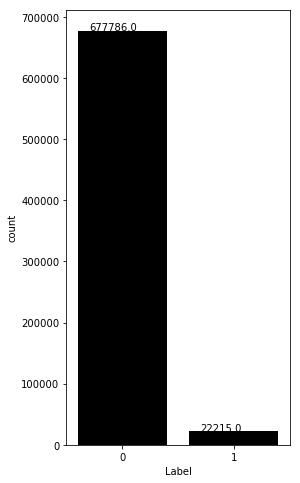

In [18]:
import seaborn as s

%matplotlib inline
plt.figure(figsize=(4,8))
ax=s.countplot(x='Label',data=df, color='black' )
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [5]:
df.columns

Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes',
       'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'Sload', 'Dload',
       'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime',
       'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat',
       'Label'],
      dtype='object')

In [6]:
df.attack_cat.unique()

array([nan, 'Exploits', 'Reconnaissance', 'DoS', 'Generic', 'Shellcode',
       ' Fuzzers', 'Worms', 'Backdoors', 'Analysis'], dtype=object)

In [7]:
df.Label.unique()

array([0, 1])

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
dur,700001.0,8.633909e-01,2.593576e+01,0.000000e+00,3.931000e-03,2.759400e-02,3.465180e-01,8.786638e+03
sbytes,700001.0,5.009637e+03,4.489868e+04,0.000000e+00,4.240000e+02,2.024000e+03,3.806000e+03,1.367739e+07
dbytes,700001.0,4.833038e+04,1.860516e+05,0.000000e+00,3.040000e+02,3.380000e+03,2.243200e+04,1.465542e+07
sttl,700001.0,3.851385e+01,3.999696e+01,0.000000e+00,3.100000e+01,3.100000e+01,3.100000e+01,2.550000e+02
dttl,700001.0,3.198078e+01,3.045076e+01,0.000000e+00,2.900000e+01,2.900000e+01,2.900000e+01,2.540000e+02
sloss,700001.0,6.330444e+00,1.885598e+01,0.000000e+00,0.000000e+00,4.000000e+00,7.000000e+00,5.096000e+03
dloss,700001.0,2.132627e+01,6.473338e+01,0.000000e+00,0.000000e+00,5.000000e+00,1.600000e+01,5.483000e+03
Sload,700001.0,6.024271e+06,5.181492e+07,0.000000e+00,7.885915e+04,5.362718e+05,1.078489e+06,5.268000e+09
Dload,700001.0,3.011023e+06,4.499952e+06,0.000000e+00,7.640437e+04,6.686759e+05,3.856223e+06,1.287619e+08
Spkts,700001.0,4.174664e+01,8.019873e+01,0.000000e+00,4.000000e+00,1.600000e+01,5.200000e+01,1.020000e+04


In [9]:
df.dtypes.head()

srcip                object
sport                object
dstip                object
dsport               object
proto                object
state                object
dur                 float64
sbytes                int64
dbytes                int64
sttl                  int64
dttl                  int64
sloss                 int64
dloss                 int64
service              object
Sload               float64
Dload               float64
Spkts                 int64
Dpkts                 int64
swin                  int64
dwin                  int64
stcpb                 int64
dtcpb                 int64
smeansz               int64
dmeansz               int64
trans_depth           int64
res_bdy_len           int64
Sjit                float64
Djit                float64
Stime                 int64
Ltime                 int64
Sintpkt             float64
Dintpkt             float64
tcprtt              float64
synack              float64
ackdat              float64
is_sm_ips_ports     

# Preprocessing

In [10]:
df.select_dtypes(include=['object']).head()

,srcip,sport,dstip,dsport,proto,state,service,attack_cat
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,dns,NaN
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,-,NaN
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,dns,NaN
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,dns,NaN
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,dns,NaN


In [11]:
df=df.drop(['srcip', 'sport','dstip', 'dsport', 'attack_cat'], axis=1)

In [12]:
len(df.columns)

44

In [13]:
df.proto.unique()

array(['udp', 'arp', 'tcp', 'ospf', 'icmp', 'igmp', 'sctp', 'udt', 'sep',
       'sun-nd', 'swipe', 'mobile', 'pim', 'rtp', 'ipnip', 'ip', 'ggp',
       'st2', 'egp', 'cbt', 'emcon', 'nvp', 'igp', 'xnet', 'argus',
       'bbn-rcc', 'chaos', 'pup', 'hmp', 'mux', 'dcn', 'prm', 'trunk-1',
       'xns-idp', 'trunk-2', 'leaf-1', 'leaf-2', 'irtp', 'rdp', 'iso-tp4',
       'netblt', 'mfe-nsp', 'merit-inp', '3pc', 'xtp', 'idpr', 'tp++',
       'ddp', 'idpr-cmtp', 'ipv6', 'il', 'idrp', 'ipv6-frag', 'sdrp',
       'ipv6-route', 'gre', 'rsvp', 'mhrp', 'bna', 'esp', 'i-nlsp',
       'narp', 'ipv6-no', 'tlsp', 'skip', 'ipv6-opts', 'any', 'cftp',
       'sat-expak', 'kryptolan', 'rvd', 'ippc', 'sat-mon', 'ipcv', 'visa',
       'cpnx', 'cphb', 'wsn', 'pvp', 'br-sat-mon', 'wb-mon', 'wb-expak',
       'iso-ip', 'secure-vmtp', 'vmtp', 'vines', 'ttp', 'nsfnet-igp',
       'dgp', 'tcf', 'eigrp', 'sprite-rpc', 'larp', 'mtp', 'ax.25',
       'ipip', 'micp', 'aes-sp3-d', 'encap', 'etherip', 'pri-enc', 'gmtp'

In [14]:
len(df.proto.unique())

135

# Label Encoding and OneHotEncoding 

In [15]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

# Label Encoding

In [16]:
df_categorical_values_enc=df.select_dtypes(include=['object']).apply(LabelEncoder().fit_transform)
print(df_categorical_values_enc.head())

   proto  state  service
0    120      2        2
1    120      2        0
2    120      2        2
3    120      2        2
4    120      2        2


In [17]:
# proto
proto=sorted(df.proto.unique())
string1 = 'Proto_'
proto_2=[string1 + x for x in proto]
# service
service=sorted(df.service.unique())
string2 = 'service_'
service_2=[string2 + x for x in service]
# state
state=sorted(df.state.unique())
string3 = 'state_'
state_2=[string3 + x for x in state]
# put together
dumcols=[]
#dumcols=''.join(proto_2 + service_2 + state_2)
dumcols.append(proto_2)
dumcols.append(service_2)
dumcols.append(state_2)
print(dumcols)

[['Proto_3pc', 'Proto_a/n', 'Proto_aes-sp3-d', 'Proto_any', 'Proto_argus', 'Proto_aris', 'Proto_arp', 'Proto_ax.25', 'Proto_bbn-rcc', 'Proto_bna', 'Proto_br-sat-mon', 'Proto_cbt', 'Proto_cftp', 'Proto_chaos', 'Proto_compaq-peer', 'Proto_cphb', 'Proto_cpnx', 'Proto_crtp', 'Proto_crudp', 'Proto_dcn', 'Proto_ddp', 'Proto_ddx', 'Proto_dgp', 'Proto_egp', 'Proto_eigrp', 'Proto_emcon', 'Proto_encap', 'Proto_esp', 'Proto_etherip', 'Proto_fc', 'Proto_fire', 'Proto_ggp', 'Proto_gmtp', 'Proto_gre', 'Proto_hmp', 'Proto_i-nlsp', 'Proto_iatp', 'Proto_ib', 'Proto_icmp', 'Proto_idpr', 'Proto_idpr-cmtp', 'Proto_idrp', 'Proto_ifmp', 'Proto_igmp', 'Proto_igp', 'Proto_il', 'Proto_ip', 'Proto_ipcomp', 'Proto_ipcv', 'Proto_ipip', 'Proto_iplt', 'Proto_ipnip', 'Proto_ippc', 'Proto_ipv6', 'Proto_ipv6-frag', 'Proto_ipv6-no', 'Proto_ipv6-opts', 'Proto_ipv6-route', 'Proto_ipx-n-ip', 'Proto_irtp', 'Proto_isis', 'Proto_iso-ip', 'Proto_iso-tp4', 'Proto_kryptolan', 'Proto_l2tp', 'Proto_larp', 'Proto_leaf-1', 'Proto_l

In [18]:
def flatten(l):
    try:
        return flatten(l[0]) + (flatten(l[1:]) if len(l) > 1 else []) if type(l) is list else [l]
    except IndexError:
        return []

In [19]:
dumcols=flatten(dumcols)
print(dumcols)
len(dumcols)

['Proto_3pc', 'Proto_a/n', 'Proto_aes-sp3-d', 'Proto_any', 'Proto_argus', 'Proto_aris', 'Proto_arp', 'Proto_ax.25', 'Proto_bbn-rcc', 'Proto_bna', 'Proto_br-sat-mon', 'Proto_cbt', 'Proto_cftp', 'Proto_chaos', 'Proto_compaq-peer', 'Proto_cphb', 'Proto_cpnx', 'Proto_crtp', 'Proto_crudp', 'Proto_dcn', 'Proto_ddp', 'Proto_ddx', 'Proto_dgp', 'Proto_egp', 'Proto_eigrp', 'Proto_emcon', 'Proto_encap', 'Proto_esp', 'Proto_etherip', 'Proto_fc', 'Proto_fire', 'Proto_ggp', 'Proto_gmtp', 'Proto_gre', 'Proto_hmp', 'Proto_i-nlsp', 'Proto_iatp', 'Proto_ib', 'Proto_icmp', 'Proto_idpr', 'Proto_idpr-cmtp', 'Proto_idrp', 'Proto_ifmp', 'Proto_igmp', 'Proto_igp', 'Proto_il', 'Proto_ip', 'Proto_ipcomp', 'Proto_ipcv', 'Proto_ipip', 'Proto_iplt', 'Proto_ipnip', 'Proto_ippc', 'Proto_ipv6', 'Proto_ipv6-frag', 'Proto_ipv6-no', 'Proto_ipv6-opts', 'Proto_ipv6-route', 'Proto_ipx-n-ip', 'Proto_irtp', 'Proto_isis', 'Proto_iso-ip', 'Proto_iso-tp4', 'Proto_kryptolan', 'Proto_l2tp', 'Proto_larp', 'Proto_leaf-1', 'Proto_le

164

# OneHotEncoding

In [20]:
enc = OneHotEncoder()
df_categorical_values_encenc = enc.fit_transform(df_categorical_values_enc)
df_cat_data = pd.DataFrame(df_categorical_values_encenc.toarray(),columns=dumcols)
df_cat_data.head()

,Proto_3pc,Proto_a/n,Proto_aes-sp3-d,Proto_any,Proto_argus,Proto_aris,Proto_arp,Proto_ax.25,Proto_bbn-rcc,Proto_bna,...,state_INT,state_MAS,state_PAR,state_REQ,state_RST,state_TST,state_TXD,state_URH,state_URN,state_no
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
df_cat_data.Proto_3pc.unique()

array([0., 1.])

In [22]:
df_cat_data.shape

(700001, 164)

In [23]:
import numpy as np

In [24]:
newdf=df.join(df_cat_data)
newdf.drop('state', axis=1, inplace=True)
newdf.drop('proto', axis=1, inplace=True)
newdf.drop('service', axis=1, inplace=True)
print(newdf.shape)

(700001, 205)


In [25]:
df.proto=df_categorical_values_enc.proto
df.head()

,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label
0,120,CON,0.001055,132,164,31,29,0,0,dns,...,0,0,3,7,1,3,1,1,1,0
1,120,CON,0.036133,528,304,31,29,0,0,-,...,0,0,2,4,2,3,1,1,2,0
2,120,CON,0.001119,146,178,31,29,0,0,dns,...,0,0,12,8,1,2,2,1,1,0
3,120,CON,0.001209,132,164,31,29,0,0,dns,...,0,0,6,9,1,1,1,1,1,0
4,120,CON,0.001169,146,178,31,29,0,0,dns,...,0,0,7,9,1,1,1,1,1,0


In [26]:
df.service=df_categorical_values_enc.service
df.head()

,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label
0,120,CON,0.001055,132,164,31,29,0,0,2,...,0,0,3,7,1,3,1,1,1,0
1,120,CON,0.036133,528,304,31,29,0,0,0,...,0,0,2,4,2,3,1,1,2,0
2,120,CON,0.001119,146,178,31,29,0,0,2,...,0,0,12,8,1,2,2,1,1,0
3,120,CON,0.001209,132,164,31,29,0,0,2,...,0,0,6,9,1,1,1,1,1,0
4,120,CON,0.001169,146,178,31,29,0,0,2,...,0,0,7,9,1,1,1,1,1,0


In [27]:
df.state=df_categorical_values_enc.state
df.head()

,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label
0,120,2,0.001055,132,164,31,29,0,0,2,...,0,0,3,7,1,3,1,1,1,0
1,120,2,0.036133,528,304,31,29,0,0,0,...,0,0,2,4,2,3,1,1,2,0
2,120,2,0.001119,146,178,31,29,0,0,2,...,0,0,12,8,1,2,2,1,1,0
3,120,2,0.001209,132,164,31,29,0,0,2,...,0,0,6,9,1,1,1,1,1,0
4,120,2,0.001169,146,178,31,29,0,0,2,...,0,0,7,9,1,1,1,1,1,0


In [28]:
x=df.drop(['Label'], axis=1)
y=df.Label

# Method 1 (Anova F-Test)

In [29]:
from sklearn.feature_selection import SelectPercentile, f_classif
np.seterr(divide='ignore', invalid='ignore');
selector=SelectPercentile(f_classif, percentile=10)
X_new = selector.fit_transform(x,y)
X_new.shape

### Get the features that were selected: for all
colNames=x.columns
true=selector.get_support()
newcolindex=[i for i, x in enumerate(true) if x]
newcolname=list( colNames[i] for i in newcolindex )
newcolname

['sttl', 'dttl', 'tcprtt', 'ackdat', 'ct_state_ttl']

# RFE (Recursive Feature Elimination) (Method 1)

In [30]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
# Create a decision tree classifier. By convention, clf means 'classifier'
clf = RandomForestClassifier(n_jobs=2)

#rank all features, i.e continue the elimination until the last one
rfe = RFE(clf, n_features_to_select=1)
rfe.fit(X_new, y)
print ("DoS Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname)))

DoS Features sorted by their rank:
[(1, 'ct_state_ttl'), (2, 'sttl'), (3, 'ackdat'), (4, 'tcprtt'), (5, 'dttl')]


# Method 2: RFE (Recursive Feature Elimination)

In [31]:
from sklearn.feature_selection import RFE
clf = RandomForestClassifier(n_jobs=2)
rfe = RFE(estimator=clf, n_features_to_select=13, step=1)
rfe.fit(x, y)
X_rfe=rfe.transform(x)
true=rfe.support_
rfecolindex=[i for i, x in enumerate(true) if x]
rfecolname=list(colNames[i] for i in rfecolindex)

In [32]:
print('Features selected for DoS:',rfecolname)
print()

Features selected for DoS: ['sbytes', 'dbytes', 'sttl', 'Sload', 'Dload', 'smeansz', 'Stime', 'Ltime', 'Sintpkt', 'tcprtt', 'synack', 'ct_state_ttl', 'ct_srv_dst']



# Test Train Split (Method 1)

In [33]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_new, y, test_size=0.33, random_state=42)

# Build the Model (Method 1)

In [34]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2,
                           min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                           max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None,
                           bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0,
                           warm_start=False, class_weight=None)

In [35]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Test the model (Method 1)

In [36]:
y_pred=clf.predict(X_test)

# Evaluate (Method 1)

In [37]:
pd.crosstab(y_test, y_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,222697,929
1,519,6856


In [38]:
from sklearn.metrics import classification_report 

In [39]:
print("Model evaluation\n"+classification_report(y_test,y_pred))

Model evaluation
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    223626
          1       0.88      0.93      0.90      7375

avg / total       0.99      0.99      0.99    231001



# Cross Validation (Method 1)

In [40]:
from sklearn.model_selection import cross_val_score
clf=RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2,
                           min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                           max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None,
                           bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0,
                           warm_start=False, class_weight=None)
scores = cross_val_score(clf, x, y, cv=10)
scores

array([0.97641462, 0.9639148 , 0.98121455, 0.99971429, 0.99798574,
       0.99451429, 0.99865712, 0.99895713, 0.99334276, 0.9808283 ])

In [41]:
print("Accuracy: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.98855 (+/- 0.02324)


# Test Train Split (Method 2)

In [42]:
from sklearn.model_selection import  train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X_rfe, y, test_size=0.33, random_state=42)

# Build Model (Method 2)

In [43]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2,
                           min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                           max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None,
                           bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0,
                           warm_start=False, class_weight=None)

In [44]:
clf.fit(X1_train,y1_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Test Model (Method 2)

In [45]:
y1_pred=clf.predict(X1_test)

# Evaluation (Method 2)

In [46]:
pd.crosstab(y_test, y_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,222697,929
1,519,6856


In [47]:
from sklearn.metrics import classification_report 

print("Model evaluation\n"+classification_report(y_test,y_pred))

Model evaluation
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    223626
          1       0.88      0.93      0.90      7375

avg / total       0.99      0.99      0.99    231001



# Cross Validation (Method 2)

In [48]:
from sklearn.model_selection import cross_val_score
clf1=RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2,
                           min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                           max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None,
                           bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0,
                           warm_start=False, class_weight=None)
scores = cross_val_score(clf, x, y, cv=10)
scores

array([0.97607177, 0.96144341, 0.97838602, 0.99965715, 0.99778575,
       0.99475714, 0.99857141, 0.99889998, 0.9927999 , 0.98077115])

In [49]:
print("Accuracy: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.98791 (+/- 0.02468)


# RFECV Ploting (Method 1)

Automatically created module for IPython interactive environment


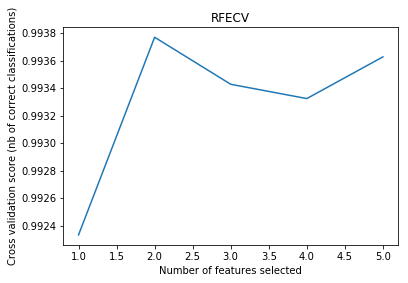

In [50]:
print(__doc__)

import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=clf, step=1, cv=10, scoring='accuracy')
rfecv.fit(X_test, y_test)
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.title('RFECV')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

# RFECV Ploting (Method 1)

Automatically created module for IPython interactive environment


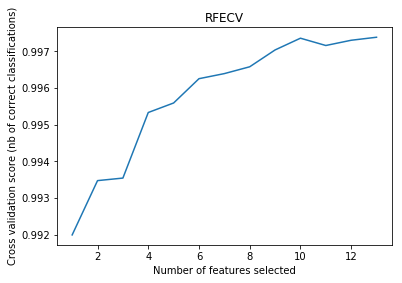

In [51]:
print(__doc__)

import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=clf, step=1, cv=10, scoring='accuracy')
rfecv.fit(X1_test, y1_test)
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.title('RFECV')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()